## EDA on Titatic dataset
Import the required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

# Upload the csv file to colab


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Titanic.csv to Titanic (1).csv


Load the dataset into pandas dataframe

In [2]:
titanic_df = pd.read_csv('Titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 # Inspect the dataset

In [3]:
# Summary stats
titanic_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
# Data types and missing info
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data cleaning and improvement


In [5]:
# Drop less useful columns
df = titanic_df.drop(columns=['Ticket', 'Cabin'], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [6]:
# Check for duplicate entries
df[df.duplicated()].shape

(0, 10)

No duplicate entries

In [7]:
# Check for missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64


*   Age has 177 missing entries
*   Embarked has 2 missing entries



In [8]:
# Remove rows with missing values
df = df.dropna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [ ]:
df.loc[:, 'Embarked'] = df['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
df.loc[:, 'Embarked'] = pd.Categorical(df['Embarked'], categories=['Cherbourg', 'Queenstown', 'Southampton'])
df.loc[:, 'Pclass'] = df['Pclass'].map({1: 'First', 2: 'Second', 3: 'Third'})
df.loc[:, 'Pclass'] = pd.Categorical(df['Pclass'], categories=['First', 'Second', 'Third'], ordered=True)
df.loc[:, 'Sex'] = df['Sex'].astype('category')

/tmp/ipython-input-73-387186023.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Southampton', 'Cherbourg', 'Southampton', 'Southampton', 'Southampton', ..., 'Queenstown', 'Southampton', 'Southampton', 'Cherbourg', 'Queenstown']
Length: 712
Categories (3, object): ['Cherbourg', 'Queenstown', 'Southampton']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df.loc[:, 'Embarked'] = df['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
/tmp/ipython-input-73-387186023.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Third', 'First', 'Third', 'First', 'Third', ..., 'Third', 'Second', 'First', 'First', 'Third']
Length: 712
Categories (3, object): ['First', 'Second', 'Third']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df.loc[:,

In [ ]:
# Get the family size of each passengers including oneself
#               sibling or spouse   parents or children
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df

/tmp/ipython-input-74-1199777844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Southampton,2
1,2,1,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Cherbourg,2
2,3,1,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Southampton,1
3,4,1,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Southampton,2
4,5,0,Third,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,Third,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,Queenstown,6
886,887,0,Second,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,Southampton,1
887,888,1,First,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,Southampton,1
889,890,1,First,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,Cherbourg,1


# Data analysis and visualization

1.   Survival overview

([<matplotlib.axis.XTick at 0x7f9b13419790>,
 [Text(0, 0, 'Non-survivor'), Text(1, 0, 'Survivor')])

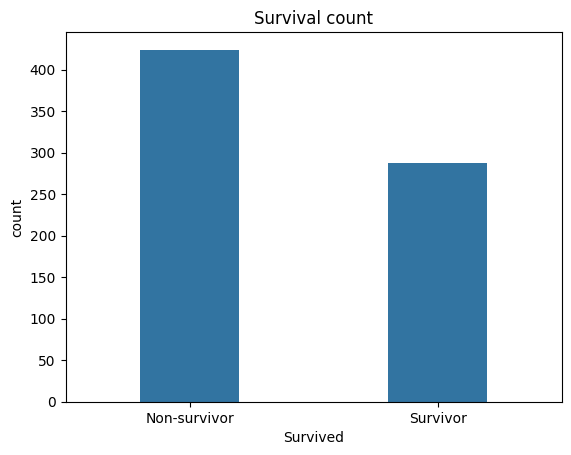

In [ ]:
sns.countplot(df, x='Survived',width=0.4)
plt.title('Survival count')
plt.xticks([0,1],['Non-survivor','Survivor'])

2.   Distribution of age by gender


Text(0.5, 1.0, 'Distribution of Age by Gender')

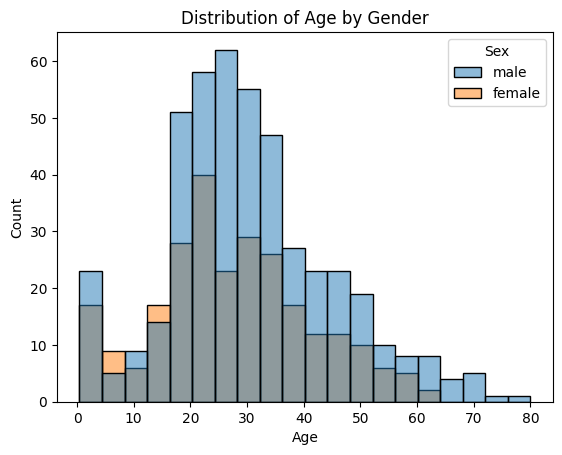

In [9]:
sns.histplot(df, x='Age', hue='Sex')
plt.title('Distribution of Age by Gender')

Analysis
*   Moles dominate most age groups.However females are relatively more in 4-16 age group.
*   Both genders show a peek around ages 15-35.



3. Age distribution by survival **status**

Text(0.5, 1.0, 'Age distribution by survival status')

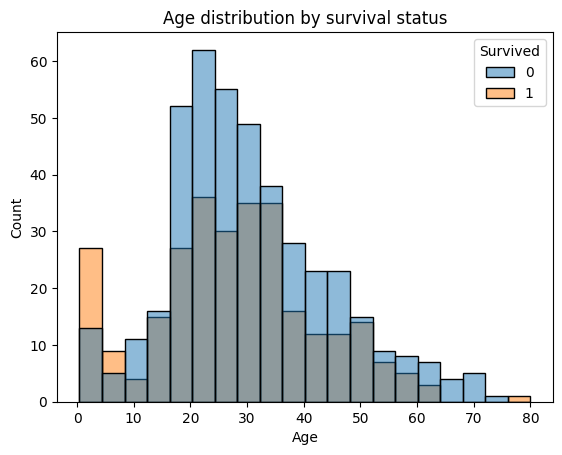

In [10]:
sns.histplot(df, x='Age', hue='Survived')
plt.title('Age distribution by survival status')

Analysis
*   The number of survivors were notably higher for children under 10 and elderly passengers over 75.
*   The highest number of death occurred among passenger aged between 15 and 35 years.


4. Gender vs Survival

Text(0.5, 1.0, 'Gender vs Survival')

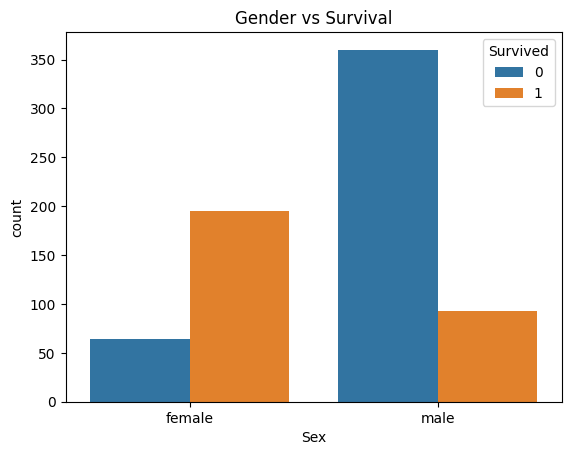

In [ ]:
sns.countplot(df, x='Sex', hue='Survived')
plt.title('Gender vs Survival')

In [ ]:
df.groupby('Sex')['Survived'].mean()

/tmp/ipython-input-75-2851150635.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Sex')['Survived'].mean()


,Survived
Sex,
female,0.752896
male,0.205298


Analysis

*  There is a significantly higher number of female survivors compared to male survivors.
* Female have a significantly higher survival rate (0.75) than the male (0.20) passengers.



5. Passenger class vs Survival

Text(0.5, 1.0, 'Pclass vs Survival')

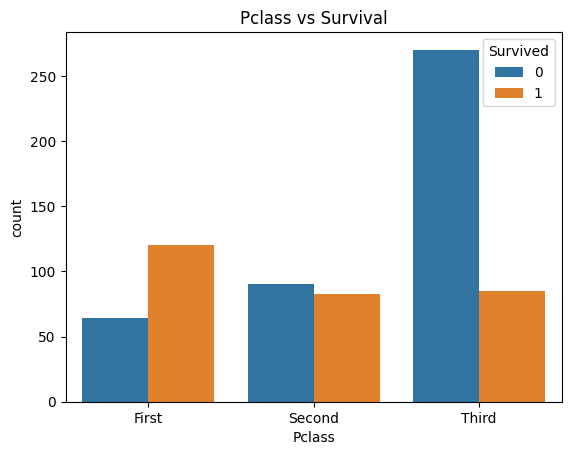

In [ ]:
sns.countplot(df, x='Pclass', hue='Survived')
plt.title('Pclass vs Survival')

In [ ]:
df.groupby('Pclass')['Survived'].mean()

/tmp/ipython-input-101-1143995730.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Pclass')['Survived'].mean()


,Survived
Pclass,
First,0.652174
Second,0.479769
Third,0.239437


Analysis

*   **3rd class** had a noticeably higher number of death .
* **1st class** passengers had higher survival rate.

6. Fare distribution by gender

<Axes: xlabel='Fare', ylabel='Count'>

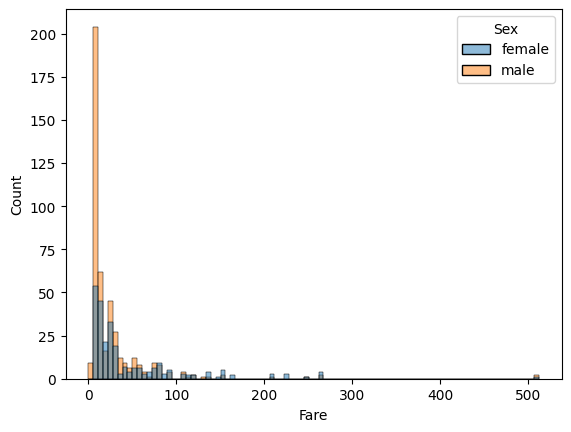

In [ ]:
sns.histplot(df, x='Fare', hue='Sex')

Analysis

*   Most passengers (both male and female) paid lower fares (between ).
*   Few females appear in the higher fare ranges



7. Fare distribution by passenger class

<Axes: xlabel='Fare', ylabel='Count'>

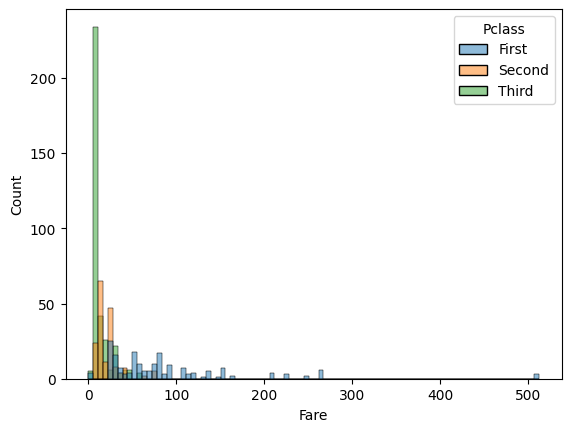

In [ ]:
sns.histplot(df, x='Fare', hue='Pclass')

In [ ]:
print(df.groupby('Pclass')['Fare'].mean())

Pclass
First     88.048121
Second    21.471556
Third     13.229435
Name: Fare, dtype: float64


/tmp/ipython-input-82-1661795136.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Pclass')['Fare'].mean())


Analysis

*   1st class had higher fares.
*   3rd class had lower fares.
*   Most people traveled in 3rd class.



8. Fare distribution by embarkation port

<Axes: xlabel='Fare', ylabel='Count'>

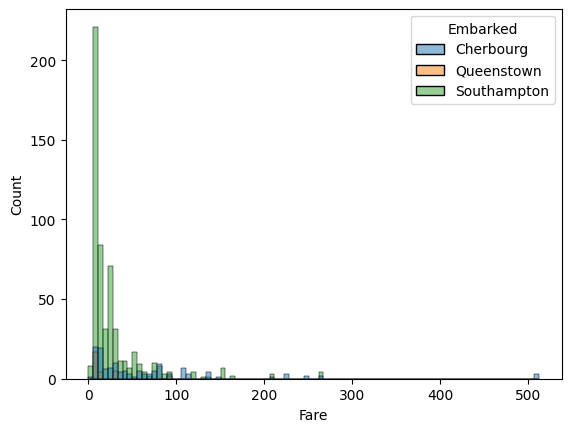

In [ ]:
sns.histplot(df, x='Fare', hue='Embarked')

In [ ]:
print(df.groupby('Embarked')['Fare'].mean())

Embarked
Cherbourg      68.296767
Queenstown     18.265775
Southampton    27.476284
Name: Fare, dtype: float64


/tmp/ipython-input-84-3300543142.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Embarked')['Fare'].mean())


Analysis

*   Passengers embarking at **C (Cherbourg)** paid the highest fares on average
*   Passengers embarking at **Q (Queenstown)** paid the lowest fares on average
*   **(S) Southampton** had the highest number of passengers.



9. Embarktion port vs Survival

Text(0.5, 1.0, 'Embarktion port vs Survival')

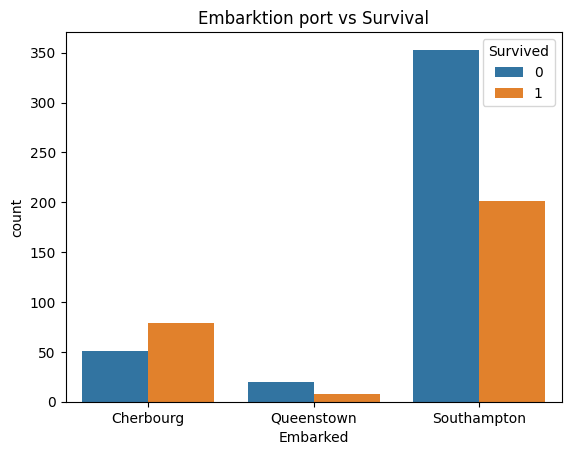

In [ ]:
sns.countplot(df, x='Embarked', hue='Survived')
plt.title('Embarktion port vs Survival')

In [ ]:
print(df.groupby('Embarked')['Survived'].mean())

Embarked
Cherbourg      0.607692
Queenstown     0.285714
Southampton    0.362816
Name: Survived, dtype: float64


/tmp/ipython-input-86-3356824309.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Embarked')['Survived'].mean())


10. Embarktion port vs Gender

<Axes: xlabel='Embarked', ylabel='count'>

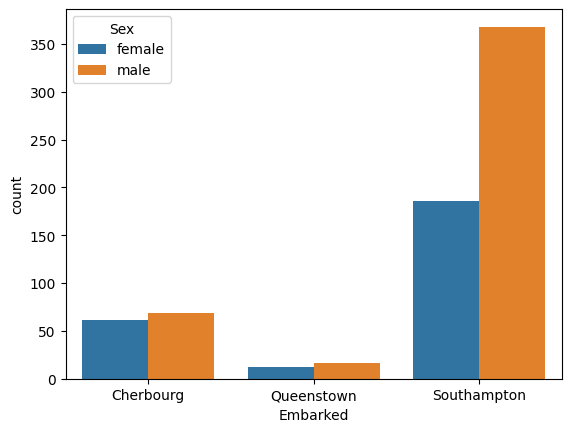

In [ ]:
sns.countplot(df, x='Embarked', hue='Sex')

Analysis

*   Southampton had the highest number of male and female passengers



11. Survival rate vs Family size

<Axes: xlabel='FamilySize', ylabel='Survived'>

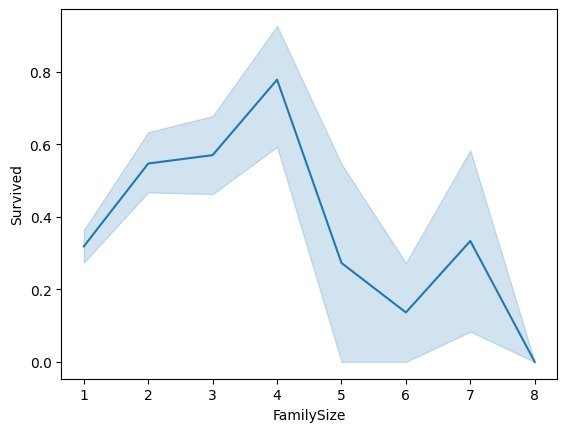

In [ ]:
sns.lineplot(df,x='FamilySize',y='Survived')

In [ ]:
df.groupby('FamilySize')['Survived'].mean()

,Survived
FamilySize,
1,0.318408
2,0.546763
3,0.569892
4,0.777778
5,0.272727
6,0.136364
7,0.333333
8,0.000000


Analysis

* Survival rate tends to higher for those who are alone or in small families(mainly 2-4 range)
* Very large families generally have lower survival chances compare to small families.

12.

<Axes: xlabel='FamilySize', ylabel='count'>

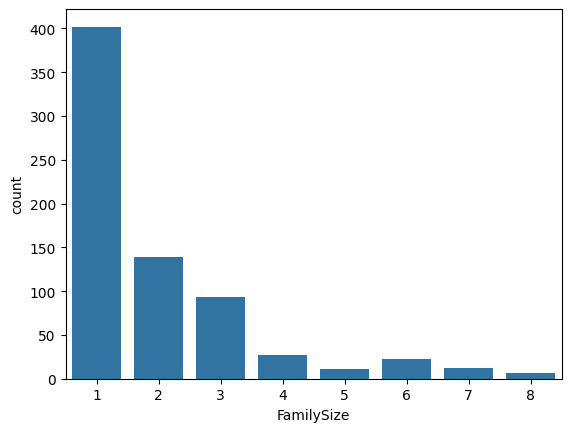

In [ ]:
sns.countplot(df,x='FamilySize')

Analysis
* Most passengers were travelling along.

<Axes: xlabel='Sex', ylabel='Age'>

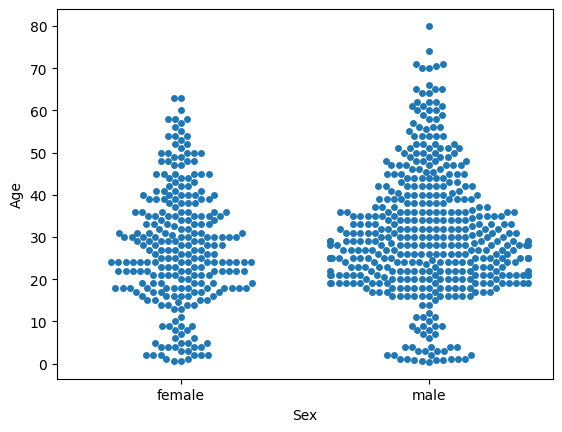

In [ ]:
sns.swarmplot(df,x = 'Sex',y = 'Age')

Jointplot

Text(0.5, 0.98, 'Joinplot: Age vs Fare by Survival')

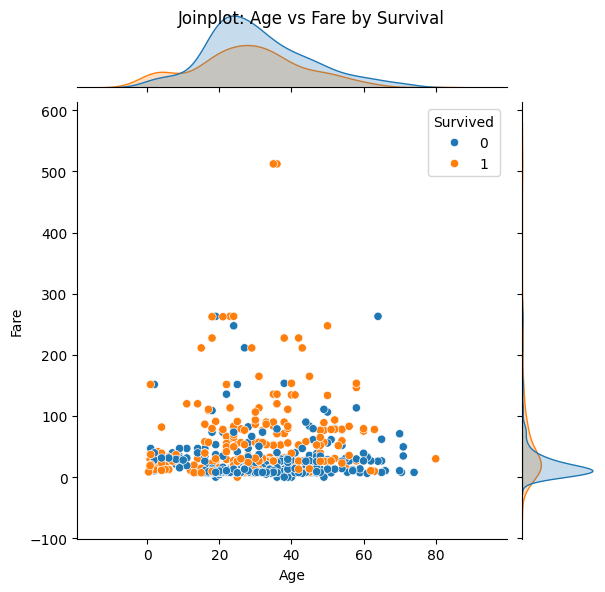

In [ ]:
sns.jointplot(data=df, y='Fare', x='Age', hue='Survived')
plt.suptitle('Jointplot: Age vs Fare by Survival')

Scatter plot

Text(0.5, 1.0, 'Scatter plot: Age vs Fare')

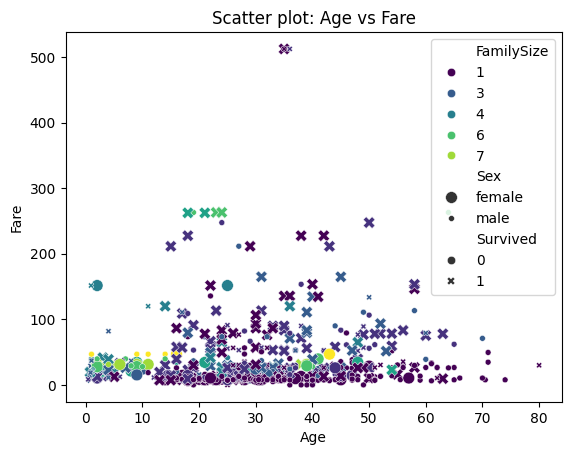

In [ ]:
sns.scatterplot(data=df,  x='Age', y='Fare',hue='FamilySize', size='Sex',style='Survived',palette='viridis')
plt.title('Scatter plot: Age vs Fare')

Pairplot

Text(0.5, 0.98, 'Pairplot: Relation between Age, Fare and Survival')

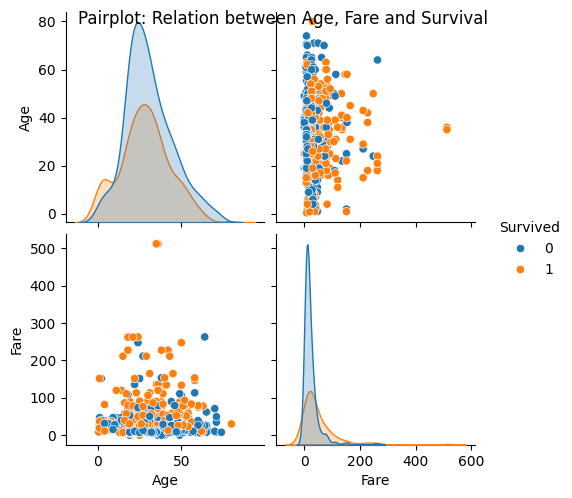

In [ ]:
sns.pairplot(df[['Age','Fare','Survived']], hue ='Survived', diag_kind='kde')
plt.suptitle('Pairplot: Relation between Age, Fare and Survival')

Text(0.5, 0.92, '3D Plot: Age vs Fare vs Survival')

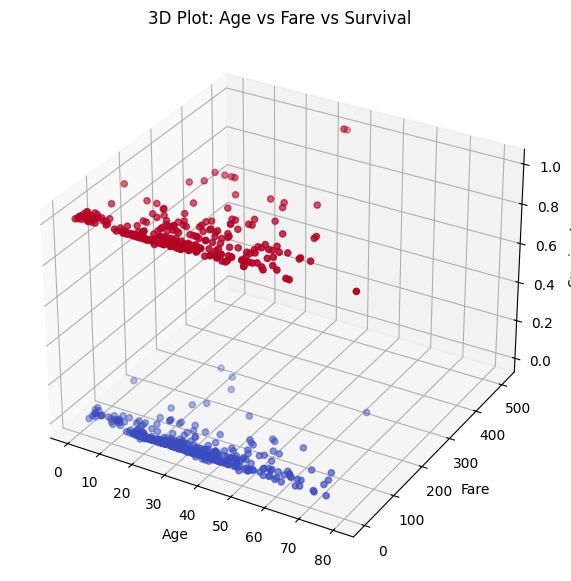

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['Age'], df['Fare'], df['Survived'], c=df['Survived'], cmap='coolwarm')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Survived')
plt.title("3D Plot: Age vs Fare vs Survival")